
</style>
<h1  style="text-align:center;font-size:60px">  Machine Learning Projects
    <h2 style="text-align:center">Classification Dataset : Drug Consumption</h2>
    <br><br>
    <h2 style="text-align:left;font-size:20px">
        <u> Date:</u> April 2021 <br><br>
        <u> Groupe 24:</u><br><br>
          <li>Anas Krichel ( anas.krichel@telecom-paris.fr )</li>
          <li>Maha Meihemid ( meihemid.meihemid@telecom-paris.fr )</li>
          <li>Louis Dorge ( ldorge@telecom-paris.fr )</li><br> 
     </h2>
</h1>

# II.Data Set : drug_consumption

## Data Set Informartion :

Database contains records for 1885 respondents. For each respondent 12 attributes are known: Personality measurements which include NEO-FFI-R (neuroticism, extraversion, openness to experience, agreeableness, and conscientiousness), BIS-11 (impulsivity), and ImpSS (sensation seeking), level of education, age, gender, country of residence and ethnicity. All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. In addition, participants were questioned concerning their use of 18 legal and illegal drugs (alcohol, amphetamines, amyl nitrite, benzodiazepine, cannabis, chocolate, cocaine, caffeine, crack, ecstasy, heroin, ketamine, legal highs, LSD, methadone, mushrooms, nicotine and volatile substance abuse and one fictitious drug (Semeron) which was introduced to identify over-claimers. For each drug they have to select one of the answers: never used the drug, used it over a decade ago, or in the last decade, year, month, week, or day.
Database contains 18 classification problems. Each of independent label variables contains seven classes: "Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", and "Used in Last Day".


 DataSet website: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

### II-1.dataset analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
np.random.seed(1234)# fixer la  graine du générateur de nombres pseudo-aléatoires.
print("libraries are imported")

libraries are imported


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [4]:
# Let's name our columns after analysis data-sheet from dataset source
columns_name = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Alcohol', 'Amphetamine', 'Amyl_nitrite', 'Benzodiazepine', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal_highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

In [5]:
# Load the data
df = pd.read_csv('drug_consumption.data', header = None, names = columns_name)

In [6]:
# Taking one outputs to predict like what was said on ecampus (this dataset contains multiple outputs to predict in parallel: please pick only one)), so we choose 'Cannabis'
df=df[['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Cannabis']]

In [7]:
# Create a variable containing all the columns/features names
data_columns = df.columns
print(data_columns)

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity',
       'Neuroticism', 'Extraversion', 'Openness', 'Agreeableness',
       'Conscientiousness', 'Impulsiveness', 'Sensation_seeking', 'Cannabis'],
      dtype='object')


In [8]:
print(f"""Missing Values: """)
display(df.isna().sum())
print(f"""Sample of the dataset: """)
display(df.head())

Missing Values: 


ID                   0
Age                  0
Gender               0
Education            0
Country              0
Ethnicity            0
Neuroticism          0
Extraversion         0
Openness             0
Agreeableness        0
Conscientiousness    0
Impulsiveness        0
Sensation_seeking    0
Cannabis             0
dtype: int64

Sample of the dataset: 


,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking,Cannabis
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3


We see that there are no missing values in the data, and all output attributes are coded as categorical data that will require preprocessing. The ID column is redundant in this data mining exercise.



In [9]:
# removing the ID column from dataset
df.drop(columns="ID", inplace=True)

In [10]:
#returns the first 5 rows of the dataframe
df.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking,Cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3


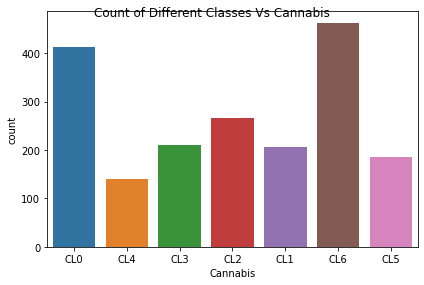

In [11]:
# Count of Different Classes Vs Cannabis"
fig, axes = plt.subplots(1,1)
fig.suptitle("Count of Different Classes Vs Cannabis")
sns.countplot(x='Cannabis', data=df)    

plt.tight_layout()
plt.show()

In [12]:
#Study of the CORRELATION BETWEEN variables and cannabis
cannabis_corr=df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson')
#cannabis_corr
cannabis_corr['Cannabis']

Age                 -0.036269
Gender               0.235378
Education            0.160696
Country              0.306935
Ethnicity           -0.121806
Neuroticism          0.050112
Extraversion         0.024334
Openness             0.108904
Agreeableness        0.013278
Conscientiousness    0.065540
Impulsiveness        0.139896
Sensation_seeking    0.120540
Cannabis             1.000000
Name: Cannabis, dtype: float64

In [13]:
demo_data = df.copy()

In [14]:
age = ['18-24' if a <= -0.9 else 
       '25-34' if a >= -0.5 and a < 0 else 
       '35-44' if a > 0 and a < 1 else 
       '45-54' if a > 1 and a < 1.5 else 
       '55-64' if a > 1.5 and a < 2 else 
       '65+' 
       for a in demo_data['Age']]

gender = ['Female' if g > 0 else "Male" for g in demo_data['Gender']]

education = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in demo_data['Education']]

country = ['USA' if c < -0.5 else 
           'New Zealand' if c > -0.5 and c < -0.4 else 
           'Other' if c > -0.4 and c < -0.2 else 
           'Australia' if c > -0.2 and c < 0 else 
           'Ireland' if c > 0 and c < 0.23 else 
           'Canada' if c > 0.23 and c < 0.9 else 
           'UK' 
           for c in demo_data['Country']]

ethnicity = ['Black' if e < -1 else 
             'Asian' if e > -1 and e < -0.4 else 
             'White' if e > -0.4 and e < -0.25 else 
             'Mixed-White/Black' if e >= -0.25 and e < 0.11 else 
             'Mixed-White/Asian' if e > 0.12 and e < 1 else 
             'Mixed-Black/Asian' if e > 1.9 else 
             'Other' 
             for e in demo_data['Ethnicity']]


demo_data['Age'] = age
demo_data['Gender'] = gender
demo_data['Education'] = education
demo_data['Country'] = country
demo_data['Ethnicity'] = ethnicity

In [15]:
def value_counts_percentage(dataset, column):
    ''' value.counts() method extended by displaying percentage '''
    
    a = dataset[column].value_counts()
    b = dataset[column].value_counts(normalize=True) * 100
    
    return pd.concat([a,b.round(2)], axis=1, keys=['N', '%'])

In [16]:
#Gender
value_counts_percentage(demo_data, 'Gender')

,N,%
Male,943,50.03
Female,942,49.97


###### comment : There is nearly the same number of male and female participants.

In [17]:
#Age
value_counts_percentage(demo_data, 'Age')

,N,%
18-24,643,34.11
25-34,481,25.52
35-44,356,18.89
45-54,294,15.60
55-64,93,4.93
65+,18,0.95


###### comment : The age is given in the intervals of about 10 years.

18-24 is the biggest age group (about 1/3 of all participants).

25-34 is 1/4 of participants.

35-54 is another 1/3 of participants. The rest 5% are the people above 55 y.o.

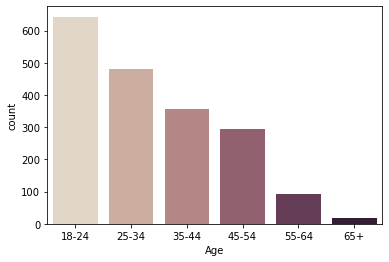

In [18]:
sns.countplot(x='Age', palette='ch:.25', data=demo_data.sort_values(by=['Age']))

In [19]:
#Education
value_counts_percentage(demo_data, 'Education')

,N,%
"Some college or university, no certificate or degree",506,26.84
University degree,480,25.46
Masters degree,283,15.01
Professional certificate/ diploma,270,14.32
Left school at 18 years,100,5.31
Left school at 16 years,99,5.25
Doctorate degree,89,4.72
Left school at 17 years,30,1.59
Left school before 16 years,28,1.49


###### comment :Educated people predominate (with college and above level - about 85% of all). Other people finished their education up to 18 y.o

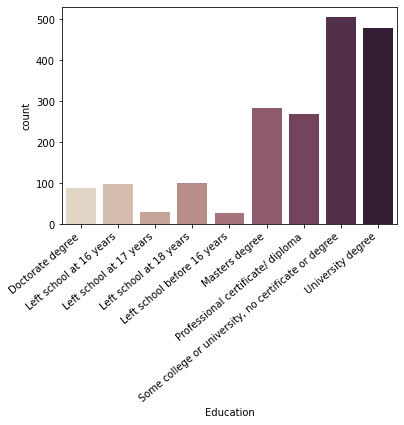

In [20]:
edu_plot = sns.countplot(x='Education', palette='ch:.25', data=demo_data.sort_values(by=['Education']))
edu_plot.set_xticklabels(edu_plot.get_xticklabels(), rotation=40, ha="right")
edu_plot

In [21]:
#Ethnicity
value_counts_percentage(demo_data, 'Ethnicity')

,N,%
White,1720,91.25
Other,63,3.34
Black,33,1.75
Asian,26,1.38
Mixed-White/Black,20,1.06
Mixed-White/Asian,20,1.06
Mixed-Black/Asian,3,0.16


###### comment : Over 90% of participants are white people.

In [22]:
#Country
value_counts_percentage(demo_data, 'Country')

,N,%
UK,1044,55.38
USA,557,29.55
Other,118,6.26
Canada,87,4.62
Australia,54,2.86
Ireland,20,1.06
New Zealand,5,0.27


###### comment : All countries are officially English-speaking.

Over 50% of participants come from the UK, almost 1/3 from the USA.

In [23]:
#Compute a simple cross-tabulation  between 'Cannabis' and 'Country'
pd.crosstab(demo_data['Cannabis'],demo_data['Country'])

Country,Australia,Canada,Ireland,New Zealand,Other,UK,USA
Cannabis,,,,,,,
CL0,2,13,3,0,12,366,17
CL1,3,7,1,0,6,177,13
CL2,6,12,1,1,13,194,39
CL3,9,11,2,0,13,104,72
CL4,9,9,3,2,12,38,67
CL5,10,8,2,0,22,58,85
CL6,15,27,8,2,40,107,264


In [24]:
#Compute a simple cross-tabulation  between 'Cannabis' and 'Education'
pd.crosstab(demo_data['Cannabis'],demo_data['Education'])

Education,Doctorate degree,Left school at 16 years,Left school at 17 years,Left school at 18 years,Left school before 16 years,Masters degree,Professional certificate/ diploma,"Some college or university, no certificate or degree",University degree
Cannabis,,,,,,,,,
CL0,25,34,5,14,6,81,82,33,133
CL1,16,10,2,9,2,60,33,20,55
CL2,17,11,3,8,2,55,37,45,88
CL3,11,8,6,5,4,29,27,56,65
CL4,4,5,1,11,1,11,20,64,23
CL5,7,8,5,13,2,16,21,81,32
CL6,9,23,8,40,11,31,50,207,84


In [25]:
#Compute a simple cross-tabulation  between 'Cannabis' and 'Ethnicity'
pd.crosstab(demo_data['Cannabis'],demo_data['Ethnicity'])


Ethnicity,Asian,Black,Mixed-Black/Asian,Mixed-White/Asian,Mixed-White/Black,Other,White
Cannabis,,,,,,,
CL0,16,23,0,3,5,11,355
CL1,3,0,0,1,1,2,200
CL2,3,2,0,4,5,4,248
CL3,1,1,0,0,1,6,202
CL4,1,1,1,3,1,11,122
CL5,0,4,0,2,4,4,171
CL6,2,2,2,7,3,25,422


In [26]:
#Compute a simple cross-tabulation  between 'Cannabis' and 'Country'
pd.crosstab(demo_data['Cannabis'],demo_data['Country'])

Country,Australia,Canada,Ireland,New Zealand,Other,UK,USA
Cannabis,,,,,,,
CL0,2,13,3,0,12,366,17
CL1,3,7,1,0,6,177,13
CL2,6,12,1,1,13,194,39
CL3,9,11,2,0,13,104,72
CL4,9,9,3,2,12,38,67
CL5,10,8,2,0,22,58,85
CL6,15,27,8,2,40,107,264


### II-2.Binarization

In [27]:
#Copy of the data 
binary_df = df.copy()  

In [28]:
from collections import Counter
y= binary_df['Cannabis']
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

Class=CL0, n=413 (21.910%)
Class=CL4, n=140 (7.427%)
Class=CL3, n=211 (11.194%)
Class=CL2, n=266 (14.111%)
Class=CL1, n=207 (10.981%)
Class=CL6, n=463 (24.562%)
Class=CL5, n=185 (9.814%)


Problem can be transformed to binary classification by union of part of classes into one new class. For example, "Never Used", "Used over a Decade Ago", "Used in Last Decade" form class "Non-user" and all other classes form class "User".

In [29]:
# transform the multiclass problem into a binary classfication
def multi_to_bin(x):
    
    if (x == 'CL0') :
        x = 0
    if (x == 'CL1') :
        x = 0
    if (x == 'CL2') :
        x = 0
    if (x == 'CL3') :
        x = 1
    if (x == 'CL4') :
        x = 1
    if (x == 'CL5') :
        x = 1
    if (x == 'CL6') :
        x = 1
    return x

In [30]:
# Applying our changes in classification of drug consumption to 'Cannabis' column
binary_df['Cannabis'] = binary_df['Cannabis'].map(multi_to_bin)


In [31]:
#returns the first 5 rows of the dataframe
binary_df.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking,Cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1


#### ML Models Binary Classfication

In [32]:
# Separating features and the target
# dataset on Cannabis target
y = binary_df['Cannabis']
X = binary_df.drop(['Cannabis'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)

In [33]:
# Centred the data
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

##### Classifier 1 : Decision Tree

Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.

A tree can be “learned” by splitting the source set into subsets based on an attribute value test. This process is repeated on each derived subset in a recursive manner called recursive partitioning. The recursion is completed when the subset at a node all has the same value of the target variable, or when splitting no longer adds value to the predictions.

Due to Decision trees can handle high dimensional data and in general decision tree classifier has good accuracy, we are going to begin by test this model because the construction of decision tree classifier does not require any domain knowledge or parameter setting, and therefore is appropriate for exploratory knowledge discovery.

###### So we are going to test the model of decision tree:

In [34]:
model_0 = DecisionTreeClassifier()
model_0.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred = model_0.predict(X_train)
print('f1_score for train data : ',metrics.f1_score(y_train, y_pred))
print('roc_auc for train data : ',metrics.roc_auc_score(y_train, y_pred))
print('average_precision train data : ',metrics.average_precision_score(y_train, y_pred))
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
print('precision train data : ',metrics.precision_score(y_train, y_pred))
print('recall train data : ',metrics.recall_score(y_train, y_pred))

f1_score for train data :  1.0
roc_auc for train data :  1.0
average_precision train data :  1.0
accuracy train data :  1.0
precision train data :  1.0
recall train data :  1.0


In [36]:
y_pred = model_0.predict(X_test)
print('f1_score for test data : ',metrics.f1_score(y_test, y_pred))
print('roc_auc for test data : ',metrics.roc_auc_score(y_test, y_pred))
print('average_precision test data : ',metrics.average_precision_score(y_test, y_pred))
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))
print('precision test data : ',metrics.precision_score(y_test, y_pred))
print('recall test data : ',metrics.recall_score(y_test, y_pred))

f1_score for test data :  0.7741935483870969
roc_auc for test data :  0.7623783783783784
average_precision test data :  0.722295990078545
accuracy test data :  0.7627118644067796
precision test data :  0.7804878048780488
recall test data :  0.768


After running this first model we have been able to observe that the accuracy of the model is 0.75; which is a good score to start ; however it is necessary to improve it a little more.

Thanks to ours resultats we observed Decision trees are able to generate understandable rules and perform classification without requiring much computation.

Althought Decision trees are able to handle both continuous and categorical variables. Decision trees provide a clear indication of which fields are most important for prediction or classification.

###### Notice 

Then when using a decision tree model on a given training dataset the accuracy keeps improving with more and more splits. So we can easily overfit the data and doesn't know when you have crossed the line unless you are using cross validation (on training data set).

However the advantage of a simple decision tree is model is easy to interpret, you know what variable and what value of that variable is used to split the data and predict outcome.

While a random forest is like a black box and works as mentioned in above answer. It's a forest you can build and control the number of trees you want and specify max num of features to be used in each tree But you cannot control the randomness, you cannot control which feature is part of which tree in the forest

So if we apply the Random Forest the accuracy will increase because this will reduce variance part of error rather than bias part, so on a given training data set decision tree may be more accurate than a random forest. But on an unexpected validation data set, Random forest always wins in terms of accuracy.

Then we are going this model in the following classifier

##### Classifier 2:  Random Forest

In this case we are going to apply Random forest,which consists of a large number of individual decision trees that operate as an ensemble and  
each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction .
Each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

However the fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:
A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

For this reason  is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction. 

######  Random Forest without parameters

In [37]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
y_pred = rfc.predict(X_train)
print('f1_score for train data : ',metrics.f1_score(y_train, y_pred))
print('roc_auc for train data : ',metrics.roc_auc_score(y_train, y_pred))
print('average_precision train data : ',metrics.average_precision_score(y_train, y_pred))
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
print('precision train data : ',metrics.precision_score(y_train, y_pred))
print('recall train data : ',metrics.recall_score(y_train, y_pred))

f1_score for train data :  1.0
roc_auc for train data :  1.0
average_precision train data :  1.0
accuracy train data :  1.0
precision train data :  1.0
recall train data :  1.0


In [39]:
y_pred = rfc.predict(X_test)
print('f1_score for test data : ',metrics.f1_score(y_test, y_pred))
print('roc_auc for test data : ',metrics.roc_auc_score(y_test, y_pred))
print('average_precision test data : ',metrics.average_precision_score(y_test, y_pred))
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))
print('precision test data : ',metrics.precision_score(y_test, y_pred))
print('recall test data : ',metrics.recall_score(y_test, y_pred))

f1_score for test data :  0.8392156862745097
roc_auc for test data :  0.8243963963963964
average_precision test data :  0.7808250325945241
accuracy test data :  0.826271186440678
precision test data :  0.823076923076923
recall test data :  0.856


After running this first model we have been able to observe that the accuracy of the model is 0.824; which is a good score better than the previous; however it is necessary to improve it a little more.

##### How to improve the accuracy of random forest?

To improve the score of our model there are 8 ways to improve it: 
1. **Add more data**
2. **Treat missing and Outlier values**
3. **Feature Engineering**
4. **Feature Selection**
5. **Multiple algorithms**
6. **Algorithm Tuning**
7. **Ensemble methods.**
8. **Cross Validation**

However throughout this challenge we have relied on three methods to boost the accuracy of a model which are the tuning algorithm, the ensemble models and cross validation.

###### IMPROVING OF SCORE RANDOM FOREST WITH  HYPERPARAMETERS

After our first random forest test without parameters we decided to look for an algorithm that would be able to find the performing parameters which give us the best accuracy in Random Forest

In [41]:
# GridSearchCV for RandomForestClassifier
print("GridSearchCV for RandomForestClassifier")
# Create param grid.
param_grid = {
    'n_estimators' : list(range(1,20)),
    'max_depth' : list(range(1,10)), 
    'class_weight': ['balanced','unbalanced'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini', 'entropy']
    }
scv = StratifiedKFold(n_splits=5)
rfc_1 = GridSearchCV(rfc,param_grid = param_grid, scoring = 'f1', cv = scv, verbose=True, n_jobs=-1)
best_rfc_1 = rfc_1.fit(X_train, y_train)
best_rfc_1


GridSearchCV for RandomForestClassifier
Fitting 5 folds for each of 2052 candidates, totalling 10260 fits


D:\anconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.68001518 0.69715117 0.706961   ...        nan        nan        nan]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'unbalanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=True)

After the application of the search algorithm we have been able to find the parameters that make our model perform better at Random Forest.

In [42]:
print("Best parameter (CV f1 random forest score=%0.3f):" % best_rfc_1.best_score_)

print("Best model:\n", best_rfc_1.best_params_)

Best parameter (CV f1 random forest score=0.834):
Best model:
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'log2', 'n_estimators': 16}


In [43]:
rfc = RandomForestClassifier(random_state=0,class_weight='balanced',
                             criterion= 'entropy',max_depth= 9,max_features='log2',n_estimators= 16)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features='log2', n_estimators=16,
                       random_state=0)

In [44]:
y_pred = rfc.predict(X_train)
print('f1_score for train data : ',metrics.f1_score(y_train, y_pred))
print('roc_auc for train data : ',metrics.roc_auc_score(y_train, y_pred))
print('average_precision train data : ',metrics.average_precision_score(y_train, y_pred))
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
print('precision train data : ',metrics.precision_score(y_train, y_pred))
print('recall train data : ',metrics.recall_score(y_train, y_pred))

f1_score for train data :  0.9516678012253234
roc_auc for train data :  0.9508089098717971
average_precision train data :  0.9414104037749791
accuracy train data :  0.9497523000707714
precision train data :  0.9708333333333333
recall train data :  0.9332443257676902


In [45]:
y_pred = rfc.predict(X_test)
print('f1_score for test data : ',metrics.f1_score(y_test, y_pred))
print('roc_auc for test data : ',metrics.roc_auc_score(y_test, y_pred))
print('average_precision test data : ',metrics.average_precision_score(y_test, y_pred))
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))
print('precision test data : ',metrics.precision_score(y_test, y_pred))
print('recall test data : ',metrics.recall_score(y_test, y_pred))

f1_score for test data :  0.8286852589641432
roc_auc for test data :  0.8169009009009008
average_precision test data :  0.7757132095776162
accuracy test data :  0.8177966101694916
precision test data :  0.8253968253968254
recall test data :  0.832


In [46]:
# Confusion matrix 
c=confusion_matrix(y_test, y_pred)
print("losses prediction  : ",(c[1][0] +(c[0][1]))/len(y_test))
print("confusion_matrix :")
c

losses prediction  :  0.18220338983050846
confusion_matrix :


array([[178,  44],
       [ 42, 208]], dtype=int64)

We increase some performances and if we widen the parameters we can have a better result.

##### Classifier 2: Neural Network classifier

In [48]:
# create model
model = Sequential()
model.add(Dense(16, input_dim=12, activation='relu'))

model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train)
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

45/45 [==============================] - 1s 2ms/step - loss: 0.6302 - accuracy: 0.6265
accuracy: 78.81%


### II-3.Multiclass Classfication 

**Problem which can be solved: Seven class classifications **

In [49]:
multi_df=df.copy()
multi_df.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness,Agreeableness,Conscientiousness,Impulsiveness,Sensation_seeking,Cannabis
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3


In [50]:
def cat_to_num(x):
    
    if (x == 'CL0') :
        x = 0
    if (x == 'CL1') :
        x = 1
    if (x == 'CL2') :
        x = 2
    if (x == 'CL3') :
        x = 3
    if (x == 'CL4') :
        x = 4
    if (x == 'CL5') :
        x = 5
    if (x == 'CL6') :
        x = 6
    return x

In [51]:
multi_df['Cannabis'] = multi_df['Cannabis'].map(cat_to_num)

In [52]:
y = multi_df['Cannabis']
X = multi_df.drop(['Cannabis'], axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify=y)
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

#### ML Models For Multiclass Classfication

In [54]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [55]:
y_pred =dummy_clf.predict(X_test)
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

accuracy test data :  0.2457627118644068


##### Classifier 1 : Random Forest

In [56]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = rfc.predict(X_train)
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
y_pred = rfc.predict(X_test)
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

accuracy train data :  1.0
accuracy test data :  0.3919491525423729


In [58]:
confusion_matrix(y_test, y_pred)

array([[66,  9, 14,  4,  0,  1,  9],
       [31,  8,  7,  0,  0,  1,  5],
       [28,  3, 10,  1,  0,  2, 23],
       [ 6,  1,  6,  4,  0,  4, 32],
       [ 4,  1,  4,  1,  0,  2, 23],
       [ 3,  1,  7,  1,  0,  2, 32],
       [ 2,  3,  6,  6,  0,  4, 95]], dtype=int64)

In [59]:
# GridSearchCV for RandomForestClassifier
print("GridSearchCV for RandomForestClassifier")
# Create param grid.
param_grid = {
    'n_estimators' : list(range(1,20)),
    'max_depth' : list(range(1,10)), 
    'class_weight': ['balanced'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion':['gini', 'entropy']
    }
scv = StratifiedKFold(n_splits=5)
rfc_grid = GridSearchCV(rfc,param_grid = param_grid, cv = scv, verbose=True, n_jobs=-1)
best_rfc_grid = rfc_grid.fit(X_train, y_train)
best_rfc_grid

GridSearchCV for RandomForestClassifier
Fitting 5 folds for each of 1026 candidates, totalling 5130 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             verbose=True)

In [61]:
print("Best parameter (CV f1 random forest score=%0.3f):" % best_rfc_grid.best_score_)

print("Best model:\n", best_rfc_grid.best_params_)

Best parameter (CV f1 random forest score=0.362):
Best model:
 {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 17}


In [62]:
rfc = RandomForestClassifier(random_state=0,class_weight='balanced',
                             criterion= 'entropy',max_depth=9,max_features='sqrt',n_estimators= 17)
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=9, max_features='sqrt', n_estimators=17,
                       random_state=0)

In [63]:
y_pred = rfc.predict(X_train)
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
y_pred = rfc.predict(X_test)
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

accuracy train data :  0.8995046001415428
accuracy test data :  0.3389830508474576


##### Classifier 2 : MLPClassifier


In [64]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)


D:\anconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [65]:
y_pred = mlp.predict(X_train)
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
y_pred = mlp.predict(X_test)
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

accuracy train data :  0.5159235668789809
accuracy test data :  0.4216101694915254


In [66]:
# GridSearchCV for MLPClassifier
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

D:\anconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [68]:
y_pred = clf.predict(X_train)
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
y_pred = clf.predict(X_test)
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

accuracy train data :  0.42179759377211606
accuracy test data :  0.4173728813559322


##### Classifier 3 : KNeighborsClassifier


In [69]:
from sklearn.neighbors import KNeighborsClassifier 
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
y_pred = neigh.predict(X_train)
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
y_pred = neigh.predict(X_test)
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

accuracy train data :  0.5966029723991507
accuracy test data :  0.3432203389830508


In [71]:
# GridSearchCV for KNeighborsClassifier
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
scv = StratifiedKFold(n_splits=5)
param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
grid = GridSearchCV(neigh, param_grid, cv = scv, scoring = 'accuracy')
grid.fit(X,y)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [72]:
y_pred = grid.predict(X_train)
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
y_pred = grid.predict(X_test)
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

accuracy train data :  0.5322009907997169
accuracy test data :  0.5190677966101694


##### Classifier 4 : ExtraTreesClassifier

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()
extra.fit(X_train, y_train)

ExtraTreesClassifier()

In [74]:
y_pred = extra.predict(X_train)
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
y_pred = extra.predict(X_test)
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

accuracy train data :  1.0
accuracy test data :  0.3919491525423729


In [75]:
# GridSearchCV for KNeighborsClassifier
params = {'n_estimators': [20,50,100],
          'max_depth': [None, 2, 5,],
          'min_samples_split': [2, 0.5,1 ],
          'min_samples_leaf': [1, 0.5, 2 ],
          'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5],
          'bootstrap':[True, False]
         }

ef_classifier_grid = GridSearchCV(extra, param_grid=params, n_jobs=-1, cv=3, verbose=1)
ef_classifier_grid.fit(X_train,y_train)

Fitting 3 folds for each of 972 candidates, totalling 2916 fits


D:\anconda\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.35244161 0.37154989 0.37721161 0.37933475 0.37933475 0.37933475
        nan        nan        nan 0.24557679 0.24557679 0.24557679
 0.24557679 0.24557679 0.24557679        nan        nan        nan
 0.37721161 0.38287332 0.39561217 0.37933475 0.37933475 0.37933475
        nan        nan        nan 0.37154989 0.39136589 0.38499646
 0.39844303 0.40622788 0.4069356         nan        nan        nan
 0.24557679 0.24557679 0.24557679 0.24557679 0.24557679 0.24557679
        nan        nan        nan 0.38358103 0.41896674 0.4069356
 0.40268931 0.39561217 0.4019816         nan        nan        nan
 0.35314933 0.3920736  0.38924275 0.39844303 0.39490446 0.40339703
        nan        nan        nan 0.24557679 0.24557679 0.24557679
 0.24557679 0.24557679 0.24557679        nan        nan        nan
 0.39561217 0.39844303 0.4118896  0.39419674 0.39631989 0.39985846
 

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 2, 5],
                         'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,
                                          0.5],
                         'min_samples_leaf': [1, 0.5, 2],
                         'min_samples_split': [2, 0.5, 1],
                         'n_estimators': [20, 50, 100]},
             verbose=1)

In [76]:
y_pred = ef_classifier_grid.predict(X_train)
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
y_pred = ef_classifier_grid.predict(X_test)
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

accuracy train data :  0.8209483368719037
accuracy test data :  0.4110169491525424


##### Classifier 5 : GradientBoostingClassifier

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
gdc = GradientBoostingClassifier()
gdc.fit(X_train,y_train)

GradientBoostingClassifier()

In [78]:
y_pred = gdc.predict(X_train)
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
y_pred = gdc.predict(X_test)
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

accuracy train data :  0.7438075017692852
accuracy test data :  0.3771186440677966


In [83]:
# GridSearchCV for KNeighborsClassifier
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01,  0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5,2),
    "min_samples_leaf": np.linspace(0.1, 0.5,2),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "n_estimators":[3]
    }

clf = GridSearchCV(gdc, parameters, cv=10, n_jobs=-1)

In [84]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print('accuracy train data : ',metrics.accuracy_score(y_train, y_pred))
y_pred = clf.predict(X_test)
print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

accuracy train data :  0.4083510261854211
accuracy test data :  0.4152542372881356


##### Classifier 6 : Stacking classifier

In [72]:
from sklearn.ensemble import StackingClassifier
estimators = [('rf', rfc),('mlp', mlp),('gdc', gdc),('extra',extra),('neigh',neigh),('grid',grid)]

clf = StackingClassifier( estimators=estimators, final_estimator=LogisticRegression())

clf.fit(X_train, y_train).score(X_test, y_test)

C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perc

0.4004237288135593

##### Classifier 6 : OneVsOneClassifier 

In [73]:
list_model=[rfc, mlp, grid]

In [74]:
for model in list_model :
    # define ovo strategy
    ovo = OneVsOneClassifier(model)
    # fit model
    ovo.fit(X_train, y_train)
    y_pred = ovo.predict(X_test)
    print(model)
    print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))
    

RandomForestClassifier()
accuracy test data :  0.4067796610169492


C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perc

MLPClassifier()
accuracy test data :  0.4343220338983051
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')
accuracy test data :  0.3898305084745763


##### Classifier 7 : OneVsOneClassifier 

In [76]:
for model in list_model :
    # define ovo strategy
    ovr = OneVsRestClassifier(model)
    # fit model
    ovr.fit(X_train, y_train)
    y_pred = ovr.predict(X_test)
    print(model)
    print('accuracy test data : ',metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()
accuracy test data :  0.4067796610169492


C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Moi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perc

MLPClassifier()
accuracy test data :  0.4194915254237288
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')
accuracy test data :  0.3940677966101695


###### Conclusion :

For the Drug_consumption dataset we tried two solutions:<br>
**-binary classfication **: <br>we consider that the classes "Never Used", "Used over a Decade Ago", "Used in Last Decade" as non user and the rest as drug consumer, we apply some models and apply cross validations to increase the performance of these models and in the end we found a score of 84%.<br>
**-Multiclass classfication**: <br>We consider the 7 classes : <br>
CL0 Never Used <br>
CL1 Used over a Decade Ago <br>
CL2 Used in Last Decade <br>
CL3 Used in Last Year <br>
CL4 Used in Last Month<br>
CL5 Used in Last Week <br>
CL6 Used in Last Day <br>
We tried many models and techniques to increase the accuracy but the best score we got was 51%.<br>
we could not get a score higher than 51% because the volume of our dataset is not big enough so that we have for some classes little volume which prevents to have enough performances.

